In [51]:
import hdf5storage as hs
import matplotlib.pyplot as plt
import math
import scipy
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline
import scipy.interpolate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.linalg import block_diag
#%matplotlib qt

In [15]:
fp = './indy_20161005_06.mat'
mat = hs.loadmat(fp)


In [16]:
channels = mat['chan_names']
cursor_pos = mat['cursor_pos']
finger_pos = mat['finger_pos']
target_pos = mat['target_pos']
timestamp = mat['t'].squeeze(1)
spikes = mat['spikes']
finger_pos_x = finger_pos[:, 1]
finger_pos_y = finger_pos[:, 2]
np.array(cursor_pos)

array([[ -7.5662167 ,  30.19510547],
       [ -7.56977832,  30.19881895],
       [ -7.57363551,  30.20273771],
       ...,
       [-26.11062374,  57.59535453],
       [-26.09597972,  57.71157571],
       [-26.08604512,  57.81180972]])

In [17]:
dir = []
time_point = []
cur_x = -7.5
cur_y = 30.2
for i in range(0,target_pos.shape[0]):
    if cur_x!=target_pos[i][0] or cur_y!=target_pos[i][1]:
        cur_dir = [target_pos[i][0] - cur_x,target_pos[i][1] - cur_y,i]
        dir.append(cur_dir)
        time_point.append(i)
        cur_x = target_pos[i][0]
        cur_y = target_pos[i][1]
print(timestamp.shape)

(93501,)


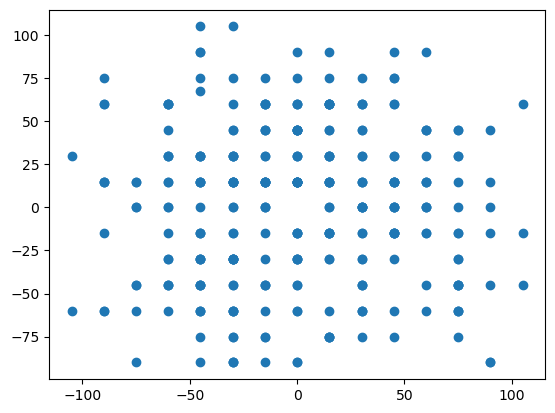

[[-4.5000e+01  6.7300e+01  0.0000e+00]
 [ 7.5000e+01 -4.5000e+01  5.9600e+02]
 [ 0.0000e+00  1.5000e+01  8.3500e+02]
 [-4.5000e+01 -3.0000e+01  1.0710e+03]
 [ 3.0000e+01  6.0000e+01  1.4020e+03]
 [ 4.5000e+01 -1.5000e+01  1.8270e+03]
 [-1.5000e+01  1.5000e+01  2.2340e+03]
 [-3.0000e+01 -6.0000e+01  2.4870e+03]
 [-6.0000e+01  6.0000e+01  2.7850e+03]
 [ 7.5000e+01 -7.5000e+01  3.1130e+03]
 [ 3.0000e+01  7.5000e+01  3.3800e+03]
 [-1.5000e+01 -4.5000e+01  3.6850e+03]
 [-1.5000e+01  1.5000e+01  3.9450e+03]
 [-6.0000e+01 -1.5000e+01  4.1960e+03]
 [-1.5000e+01  4.5000e+01  4.4730e+03]
 [ 7.5000e+01 -3.0000e+01  4.7720e+03]
 [-3.0000e+01 -4.5000e+01  5.0170e+03]
 [ 3.0000e+01  6.0000e+01  5.2810e+03]
 [ 3.0000e+01  0.0000e+00  5.5470e+03]
 [-7.5000e+01  0.0000e+00  5.8970e+03]
 [ 7.5000e+01 -3.0000e+01  6.2270e+03]
 [-3.0000e+01  1.5000e+01  6.5500e+03]
 [ 0.0000e+00  1.5000e+01  6.8070e+03]
 [-3.0000e+01 -7.5000e+01  7.0700e+03]
 [ 0.0000e+00  1.5000e+01  7.3830e+03]
 [ 3.0000e+01  1.5000e+01

In [18]:
#查看方向分布
xy = np.array(dir)
plt.scatter(xy[:,0],xy[:,1])
plt.show()
print(xy)

In [19]:
#对单个神经元记录上下左右四个方向上脉冲的raster
move_up = []
move_down = []
move_right = []
move_left = []
num = [1.,1.,1.,1.]
for i in range(0,np.array(dir).shape[0]):
    if xy[i][0] == 0:
        if xy[i][1] < 0:
            for j in range(0,spikes[50][1].shape[0]):
                if spikes[50][1][j] >= timestamp[int(xy[i][2])] and spikes[50][1][j] <= timestamp[int(xy[i][2])+300] and num[0]<=10:
                    move_down.append([round(((spikes[50][1][j] - timestamp[int(xy[i][2])]).tolist()[0])/0.04),num[0]])
            num[0]+=1
        else: 
            for j in range(0,spikes[50][1].shape[0]):
                if spikes[50][1][j] >= timestamp[int(xy[i][2])] and spikes[50][1][j] <= timestamp[int(xy[i][2])+300]and num[1]<=10:
                    move_up.append([round(((spikes[50][1][j] - timestamp[int(xy[i][2])]).tolist()[0])/0.04),num[1]])
        num[1]+=1
    if xy[i][1] == 0:
        if xy[i][0] < 0:
            for j in range(0,spikes[50][1].shape[0]):
                if spikes[50][1][j] >= timestamp[int(xy[i][2])] and spikes[50][1][j] <= timestamp[int(xy[i][2])+300]and num[2]<=10:
                    move_left.append([round(((spikes[50][1][j] - timestamp[int(xy[i][2])]).tolist()[0])/0.04),num[2]])
            num[2]+=1
        else:
            for j in range(0,spikes[50][1].shape[0]):
                if spikes[50][1][j] >= timestamp[int(xy[i][2])] and spikes[50][1][j] <= timestamp[int(xy[i][2])+300]and num[3]<=10:
                    move_right.append([round(((spikes[50][1][j] - timestamp[int(xy[i][2])]).tolist()[0])/0.04),num[3]])
        num[3]+=1
print(move_down)

[[6, 1.0], [7, 1.0], [16, 1.0], [18, 1.0], [2, 2.0], [6, 2.0], [20, 2.0], [28, 2.0], [29, 2.0], [10, 3.0], [29, 3.0], [6, 4.0], [7, 4.0], [7, 4.0], [8, 4.0], [8, 4.0], [13, 4.0], [22, 4.0], [0, 5.0], [2, 5.0], [2, 5.0], [6, 5.0], [8, 5.0], [9, 5.0], [12, 5.0], [27, 5.0], [28, 5.0], [28, 5.0], [29, 5.0], [7, 6.0], [8, 6.0], [15, 6.0], [19, 6.0], [29, 6.0], [5, 7.0], [8, 7.0], [14, 7.0], [22, 7.0], [25, 7.0], [26, 7.0], [29, 7.0], [2, 8.0], [8, 8.0], [8, 8.0], [11, 8.0], [12, 8.0], [12, 8.0], [14, 8.0], [13, 9.0], [24, 9.0], [26, 9.0], [27, 9.0], [27, 9.0], [8, 10.0], [17, 10.0]]


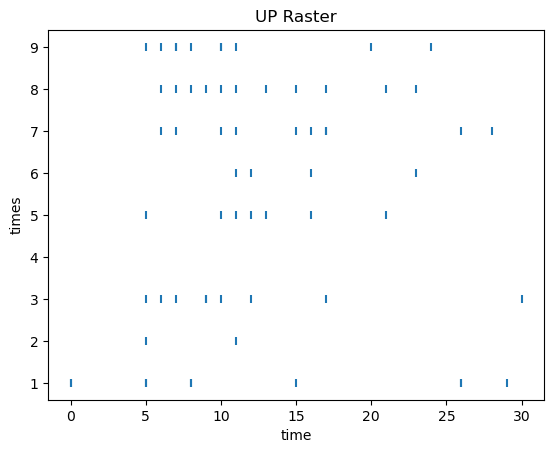

In [20]:
#绘制向上运动时的raster
spike_raster_up = np.array(move_up)
plt.scatter(spike_raster_up[:,0],spike_raster_up[:,1],marker = '|')
plt.title("UP Raster")
plt.ylabel("times")
plt.xlabel("time")
plt.show()

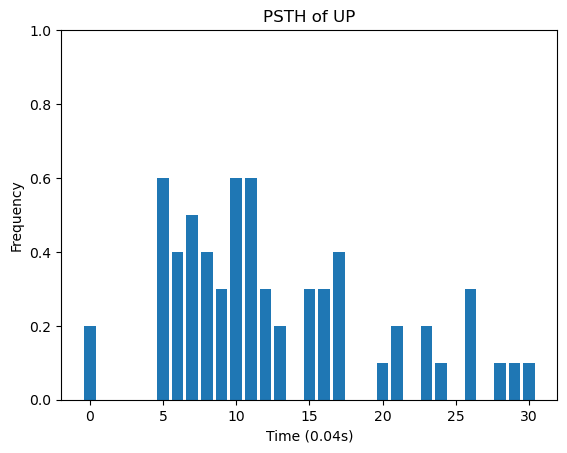

In [21]:
#绘制向上运动时的PSTH
psth_up=[0]*31
for i in range(0,np.array(move_up).shape[0]):
    psth_up[move_up[i][0]]+=1
psth_up = [item / 10 for item in psth_up]
plt.subplots()
plt.bar(range(0,31), psth_up)
plt.ylim(0,1.0)
plt.title('PSTH of UP')
plt.xlabel('Time (0.04s)')
plt.ylabel('Frequency')
plt.show()

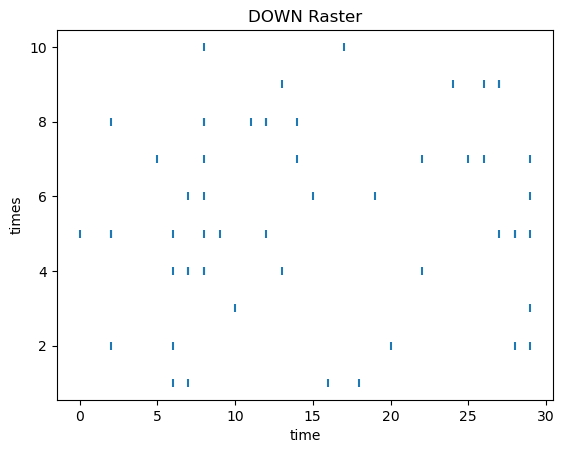

In [22]:
#绘制向下运动时的raster
spike_raster_down = np.array(move_down)
plt.scatter(spike_raster_down[:,0],spike_raster_down[:,1],marker = '|')
plt.title("DOWN Raster")
plt.ylabel("times")
plt.xlabel("time")
plt.show()

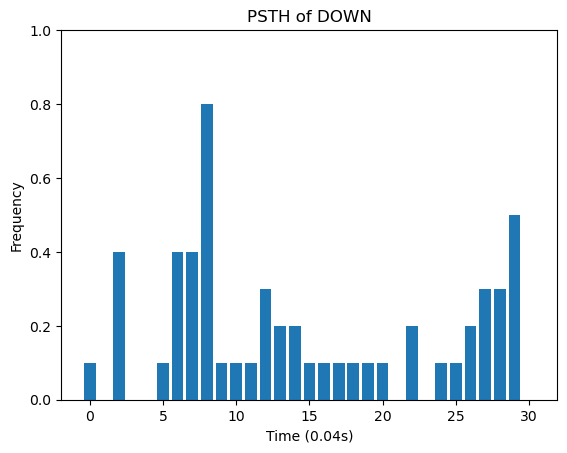

In [23]:
#绘制向下运动时的PSTH
psth=[0]*31
for i in range(0,np.array(move_down).shape[0]):
    psth[move_down[i][0]]+=1
psth = [item / 10 for item in psth]
plt.subplots()
plt.bar(range(0,31), psth)
plt.ylim(0,1.0)
plt.title('PSTH of DOWN')
plt.xlabel('Time (0.04s)')
plt.ylabel('Frequency')
plt.show()

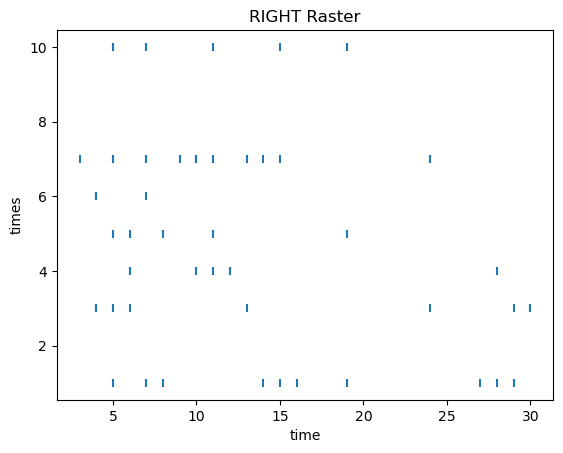

In [24]:
#绘制向右运动时的raster
spike_raster_right = np.array(move_right)
plt.scatter(spike_raster_right[:,0],spike_raster_right[:,1],marker = '|')
plt.title("RIGHT Raster")
plt.ylabel("times")
plt.xlabel("time")
plt.show()

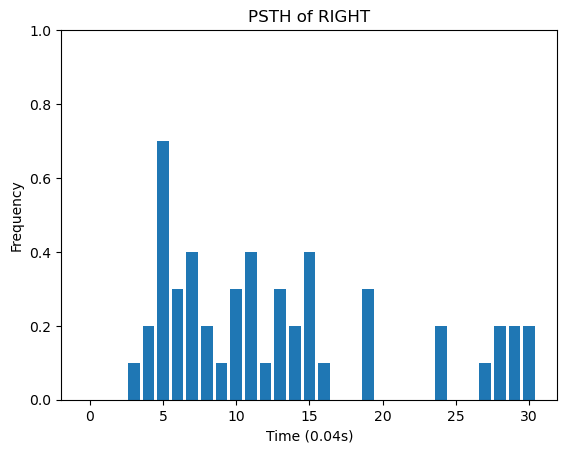

In [25]:
#绘制向右运动时的PSTH
psth=[0]*31
for i in range(0,np.array(move_right).shape[0]):
    psth[move_right[i][0]]+=1
psth = [item / 10 for item in psth]
plt.subplots()
plt.bar(range(0,31), psth)
plt.ylim(0,1.0)
plt.title('PSTH of RIGHT')
plt.xlabel('Time (0.04s)')
plt.ylabel('Frequency')
plt.show()

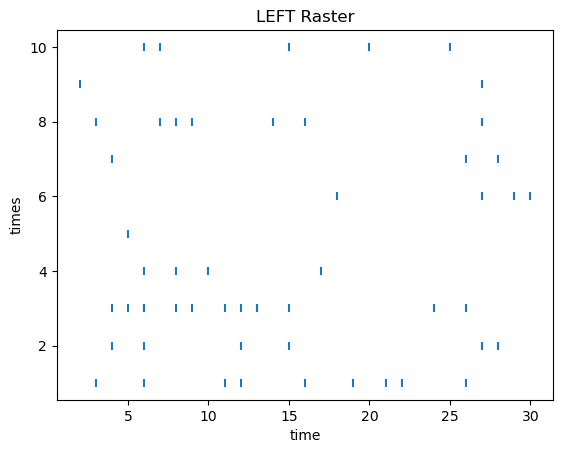

In [26]:
#绘制向左运动时的raster
spike_raster_left = np.array(move_left)
plt.scatter(spike_raster_left[:,0],spike_raster_left[:,1],marker = '|')
plt.title("LEFT Raster")
plt.ylabel("times")
plt.xlabel("time")
plt.show()

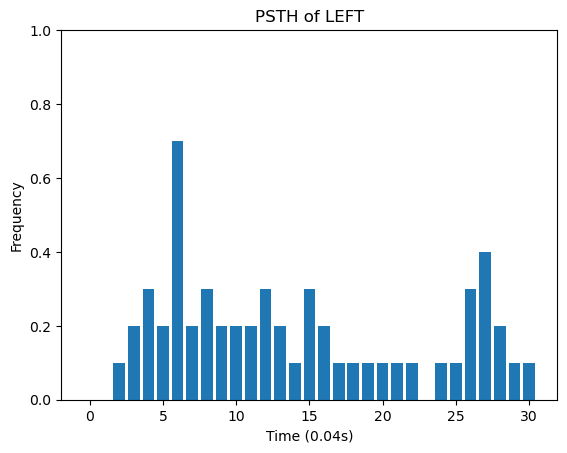

In [27]:
#绘制向左运动时的PSTH
psth=[0]*31
for i in range(0,np.array(move_left).shape[0]):
    psth[move_left[i][0]]+=1
psth = [item / 10 for item in psth]
plt.subplots()
plt.bar(range(0,31), psth)
plt.ylim(0,1.0)
plt.title('PSTH of LEFT')
plt.xlabel('Time (0.04s)')
plt.ylabel('Frequency')
plt.show()

In [62]:
#统计各个角度移动时神经元脉冲占比

angles = np.degrees(np.arctan2(xy[:,1],xy[:,0]))
angles = np.mod(angles, 360)
isRecord = [0]*295
stat_angles = []
print(angles.shape)
for i in range(0,angles.shape[0]):
    if isRecord[i]==0 and angles[i]%45==0:
        angle = angles[i]
        total_timestamp_num = 0
        total_spike_num = 0
        for j in range(i,angles.shape[0]):
            spike_num = 0
            if angles[j] == angle:
                if j == 294:
                    timestamp_num = 93501-int(xy[j][2])
                    for k in range(0,spikes[50][1].shape[0]):
                        if(spikes[50][1][k] >= timestamp[int(xy[i][2])] and spikes[50][1][k] <= timestamp[93500]):
                            spike_num+=1
                else:
                    timestamp_num = int(xy[j+1][2])-int(xy[j][2])
                    for k in range(0,spikes[50][1].shape[0]):
                        if(spikes[50][1][k] >= timestamp[int(xy[i][2])] and spikes[50][1][k] <= timestamp[int(xy[j+1][2])-1]):
                            spike_num+=1
                isRecord[j] = 1
            total_timestamp_num += timestamp_num
            total_spike_num += spike_num
        stat_angles.append([angles[i],total_spike_num/total_timestamp_num*250])
print(stat_angles)

(295,)
[[90.0, 57.86926045162911], [135.0, 28.544243577545195], [315.0, 30.551614448249996], [0.0, 45.042535012444745], [180.0, 35.56237242134312], [225.0, 32.14281351915865], [270.0, 45.60757287705957], [45.0, 26.599296156681643]]


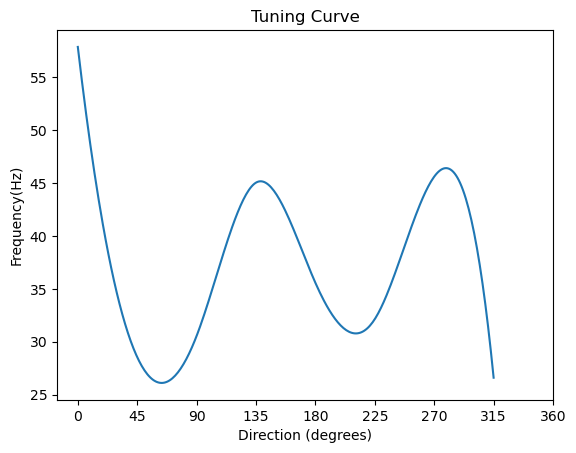

(2376, 1)


In [64]:
tuning_curve = np.array(stat_angles)
x = np.linspace(tuning_curve[:,0].min(),tuning_curve[:,0].max(),8)
x_smooth = np.linspace(tuning_curve[:,0].min(),tuning_curve[:,0].max(),300)
y_smooth = make_interp_spline(x, np.array(tuning_curve[:,1]))(x_smooth)
plt.plot(x_smooth,y_smooth)
plt.title('Tuning Curve')
plt.xlabel('Direction (degrees)')
plt.ylabel('Frequency(Hz)')
plt.xticks([0,45,90,135,180,225,270,315,360])
plt.show()
print(spikes[50][1].shape)

In [39]:
#计算各神经元（规定脉冲次数低于500的不算神经元unit）方向模型的r2
r2_fig = [0,0,0,0,0,0]
unit_count = 0
for ch_index in range(0,spikes.shape[0]):
    for unit_index in range(1,5):
        if spikes[ch_index][unit_index].shape[0]>=500:
            unit_count+=1
            isRecord = [0]*295
            stat_angles = []
            for i in range(0,angles.shape[0]):
                if isRecord[i]==0:
                    angle = angles[i]
                    total_timestamp_num = 0
                    total_spike_num = 0
                    for j in range(i,angles.shape[0]):
                        spike_num = 0
                        if angles[j] == angle:
                            if j == 294:
                                timestamp_num = 93501-int(xy[j][2])
                                for k in range(0,spikes[ch_index][unit_index].shape[0]):
                                    if(spikes[ch_index][unit_index][k] >= timestamp[int(xy[i][2])] and spikes[ch_index][unit_index][k] <= timestamp[93500]):
                                        spike_num+=1
                            else:
                                timestamp_num = int(xy[j+1][2])-int(xy[j][2])
                                for k in range(0,spikes[ch_index][unit_index].shape[0]):
                                    if(spikes[ch_index][unit_index][k] >= timestamp[int(xy[i][2])] and spikes[ch_index][unit_index][k] <= timestamp[int(xy[j+1][2])-1]):
                                        spike_num+=1
                            isRecord[j] = 1
                        total_timestamp_num += timestamp_num
                        total_spike_num += spike_num
                    stat_angles.append([angles[i],total_spike_num/total_timestamp_num*250])
            tuning_curve = np.array(stat_angles)
            y = tuning_curve[:,1]
            x = tuning_curve[:,0]
            x_train = x.reshape(len(x),1)
            y_train = y.reshape(len(y),1)
            model = LinearRegression()
            model.fit(x_train, y_train)
            y_pred = model.predict(x_train)
            r_squared = r2_score(y_train, y_pred)
            r2_fig[round(r_squared/0.0005)-11]+=1
            print(r2_fig)

[0, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 0]
[0, 0, 2, 1, 0, 0]
[0, 0, 2, 2, 0, 0]
[0, 0, 3, 2, 0, 0]
[0, 0, 3, 3, 0, 0]
[0, 0, 4, 3, 0, 0]
[0, 0, 5, 3, 0, 0]
[0, 0, 6, 3, 0, 0]
[0, 0, 7, 3, 0, 0]
[0, 0, 8, 3, 0, 0]
[0, 0, 9, 3, 0, 0]
[0, 0, 9, 3, 1, 0]
[0, 0, 9, 4, 1, 0]
[0, 0, 10, 4, 1, 0]
[0, 0, 10, 5, 1, 0]
[0, 0, 10, 6, 1, 0]
[0, 0, 10, 7, 1, 0]
[0, 0, 10, 8, 1, 0]
[0, 0, 10, 9, 1, 0]
[0, 0, 11, 9, 1, 0]
[0, 0, 12, 9, 1, 0]
[0, 0, 13, 9, 1, 0]
[0, 1, 13, 9, 1, 0]
[0, 1, 14, 9, 1, 0]
[0, 1, 15, 9, 1, 0]
[0, 1, 16, 9, 1, 0]
[0, 1, 17, 9, 1, 0]
[0, 1, 18, 9, 1, 0]
[0, 1, 19, 9, 1, 0]
[0, 1, 19, 9, 2, 0]
[0, 1, 19, 10, 2, 0]
[0, 1, 20, 10, 2, 0]
[0, 1, 21, 10, 2, 0]
[0, 1, 21, 11, 2, 0]
[0, 1, 22, 11, 2, 0]
[0, 1, 23, 11, 2, 0]
[0, 1, 23, 12, 2, 0]
[0, 1, 23, 13, 2, 0]
[0, 1, 24, 13, 2, 0]
[0, 2, 24, 13, 2, 0]
[0, 2, 24, 14, 2, 0]
[0, 2, 25, 14, 2, 0]
[0, 2, 25, 15, 2, 0]
[0, 2, 25, 16, 2, 0]
[0, 2, 26, 16, 2, 0]
[0, 2, 27, 16, 2, 0]
[0, 2, 28, 16, 2, 0]
[0, 2, 29, 16, 2, 0]
[0, 2, 30, 16, 2

95


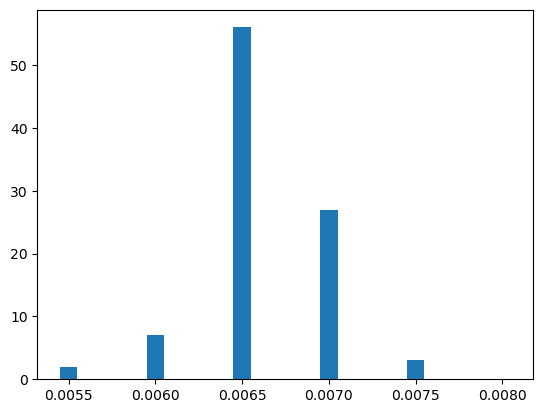

In [40]:
#绘制r2图
print(unit_count)
r2_x = [0.0055,0.006,0.0065,0.0070,0.0075,0.0080]
plt.bar(r2_x,r2_fig,width = 0.0001)
plt.show()